In [1]:
credit = read.csv("./data/credit.csv", header = T)

In [2]:
credit$default = as.factor(credit$default)

In [3]:
set.seed(100) # to control randomness and get similar results

train = sample(1:1000, 800)
test = -train

training_data = credit[train, ]
testing_data = credit[test, ]

In [4]:
library(randomForest)

Warning message:
: package ‘randomForest’ was built under R version 3.2.3randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.


In [8]:
model_new = randomForest(default ~ ., data = training_data, mtry = 6, importance = TRUE)
model_new


Call:
 randomForest(formula = default ~ ., data = training_data, mtry = 6,      importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 6

        OOB estimate of  error rate: 25%
Confusion matrix:
    1   2 class.error
1 486  56   0.1033210
2 144 114   0.5581395

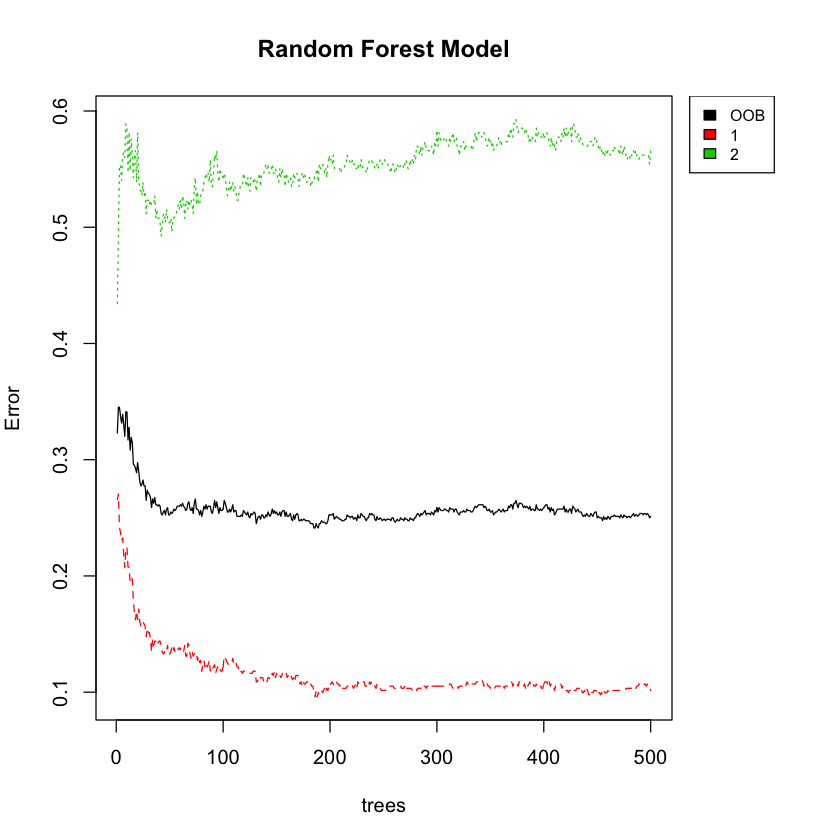

In [6]:
layout(matrix(c(1, 2), nrow = 1), width = c(4, 1))
par(mar = c(5, 4, 4, 0)) #No margin on the right side
plot(model, main = "Random Forest Model")
par(mar = c(5, 0, 4, 2)) #No margin on the left side
plot(c(0, 1), type = "n", axes = F, xlab = "", ylab = "")
legend("top", colnames(model$err.rate), col = 1:3, cex = 0.8, fill = 1:3)

In [9]:
imp = importance(model_new)[, 1]
sort(imp, decreasing = TRUE)

months_loan_duration     checking_balance               amount 
         18.08135765          16.23619397          13.30522011 
    installment_plan       credit_history             property 
          8.35926728           7.98074466           7.62385839 
                 age     existing_credits              housing 
          5.62056522           4.24245539           4.17344018 
       other_debtors              purpose     installment_rate 
          4.10411931           3.89852050           3.81184873 
   employment_length           dependents    residence_history 
          2.81224513           2.55300661           1.81717099 
     savings_balance                  job            telephone 
          1.55778475           0.63372011           0.14552350 
     personal_status       foreign_worker 
         -0.00284315          -0.11538716

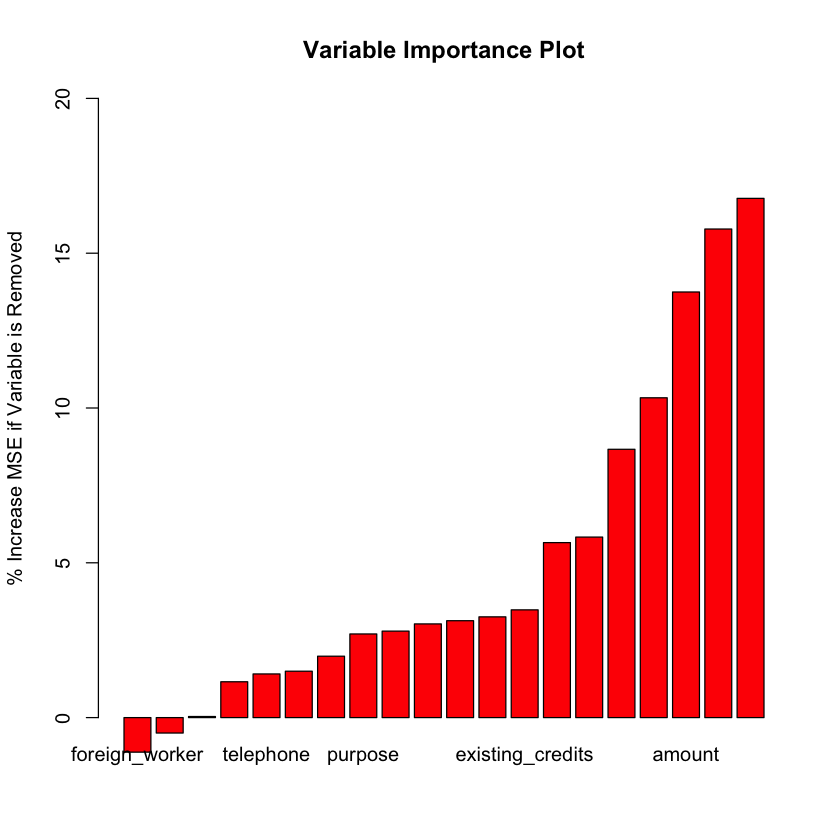

In [8]:
barplot(sort(imp), 
        col = "red", 
        main = "Variable Importance Plot", 
        ylim = c(0,20),
        ylab = "% Increase MSE if Variable is Removed")

In [9]:
summary(getTree(model, k = 1, labelVar = TRUE))

 left daughter    right daughter                  split var    split point     
 Min.   :  0.00   Min.   :  0.00   age                 : 21   Min.   :    0.0  
 1st Qu.:  0.00   1st Qu.:  0.00   amount              : 21   1st Qu.:    0.0  
 Median :  0.00   Median :  0.00   months_loan_duration: 14   Median :    0.0  
 Mean   : 63.75   Mean   : 64.25   purpose             : 12   Mean   :  376.1  
 3rd Qu.:127.00   3rd Qu.:128.00   savings_balance     : 11   3rd Qu.:   11.0  
 Max.   :254.00   Max.   :255.00   (Other)             : 48   Max.   :15037.0  
                                   NA's                :128                    
     status           prediction       
 Min.   :-1.000000   Length:255        
 1st Qu.:-1.000000   Class :character  
 Median :-1.000000   Mode  :character  
 Mean   :-0.003922                     
 3rd Qu.: 1.000000                     
 Max.   : 1.000000                     
                                       

In [10]:
predicted_y = predict(model, testing_data)

In [11]:
OOB.votes = predict(model, testing_data, type="prob")
OOB.pred = OOB.votes[,2]

In [13]:
library(ROCR)

Warning message:
: package ‘ROCR’ was built under R version 3.2.4Loading required package: gplots
Warning message:
: package ‘gplots’ was built under R version 3.2.4
Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



In [14]:
pred.obj = prediction(OOB.pred, testing_data$default);

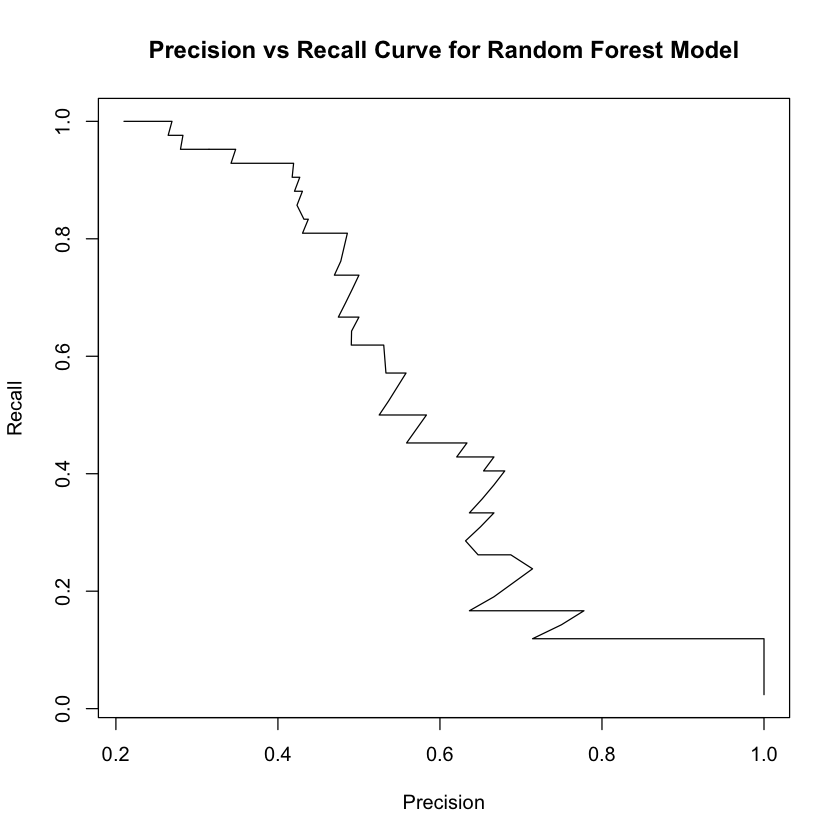

In [28]:
RP.perf <- performance(pred.obj, "rec","prec")
plot (RP.perf, main = "Precision vs Recall Curve for Random Forest Model")

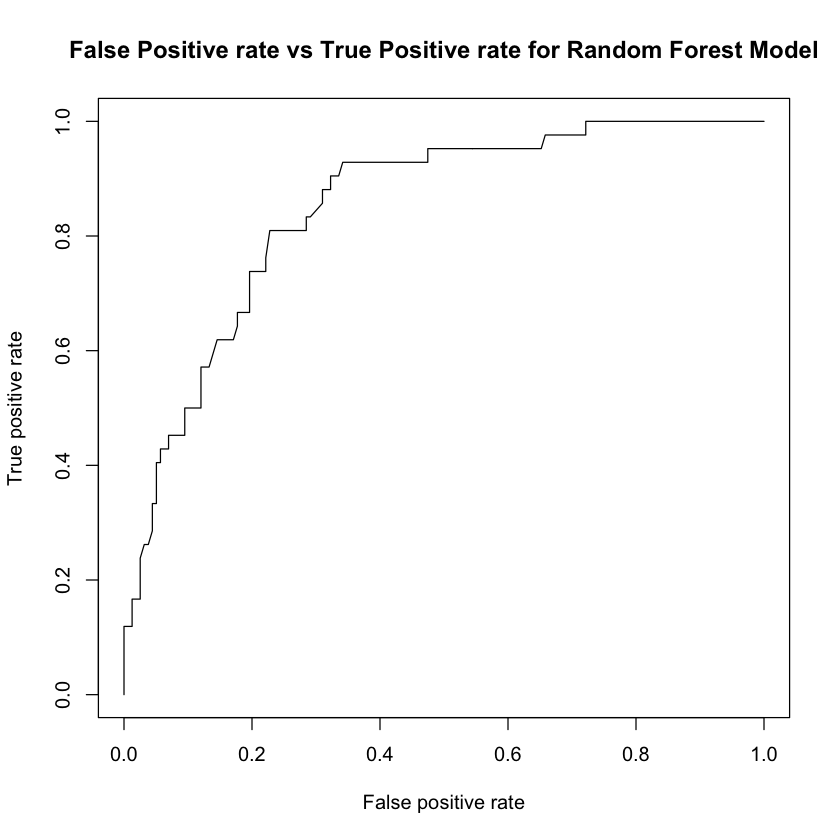

In [26]:
ROC.perf = performance(pred.obj, "tpr","fpr")
plot (ROC.perf, main = "True Positive vs False Positive for Random Forest Model")

In [29]:
model = randomForest(default ~., data = training_data, mtry = 13, importance = TRUE)
model


Call:
 randomForest(formula = default ~ ., data = training_data, mtry = 13,      importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 13

        OOB estimate of  error rate: 24.75%
Confusion matrix:
    1   2 class.error
1 476  66   0.1217712
2 132 126   0.5116279

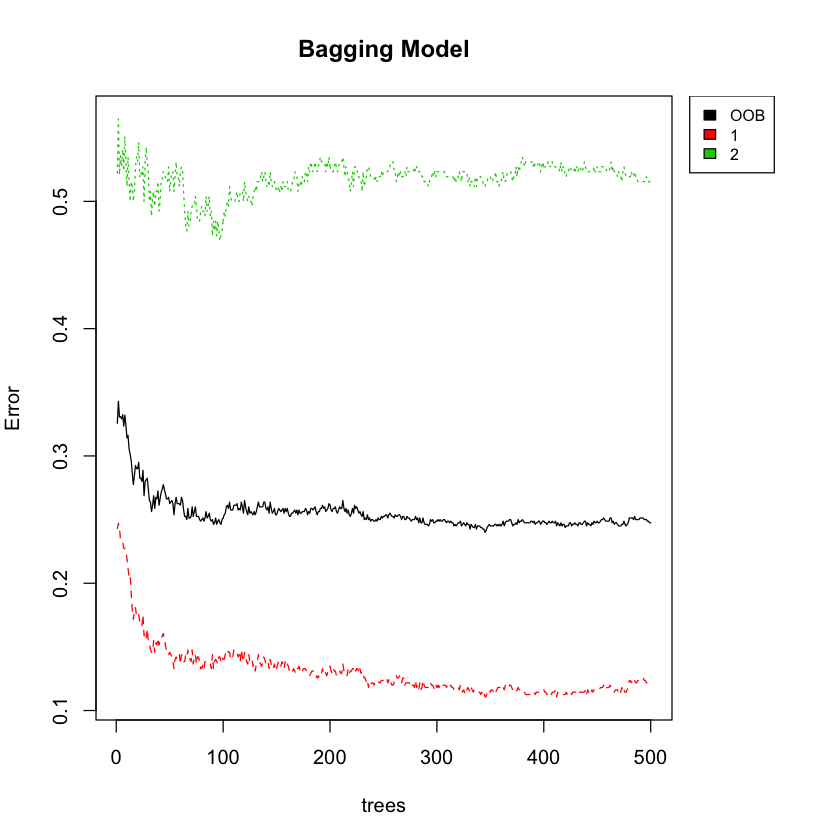

In [30]:
layout(matrix(c(1, 2), nrow = 1), width = c(4, 1))
par(mar = c(5, 4, 4, 0)) #No margin on the right side
plot(model, main = "Bagging Model")
par(mar = c(5, 0, 4, 2)) #No margin on the left side
plot(c(0, 1), type = "n", axes = F, xlab = "", ylab = "")
legend("top", colnames(model$err.rate), col = 1:3, cex = 0.8, fill = 1:3)

In [31]:
imp = importance(model)[,1]
sort(imp, decreasing = TRUE)

checking_balance months_loan_duration               amount 
          17.8795482           17.1367897           16.6170112 
      credit_history     installment_plan             property 
          11.8711851           10.1929521            8.4016235 
                 age     existing_credits    employment_length 
           8.2563017            4.5302196            4.5130227 
       other_debtors     installment_rate    residence_history 
           3.8788632            3.7804414            3.3712947 
             housing              purpose           dependents 
           3.2091356            2.2630840            1.6545092 
     savings_balance            telephone      personal_status 
           1.6383434            1.4535785            0.7959737 
                 job       foreign_worker 
           0.6933033           -1.1266524

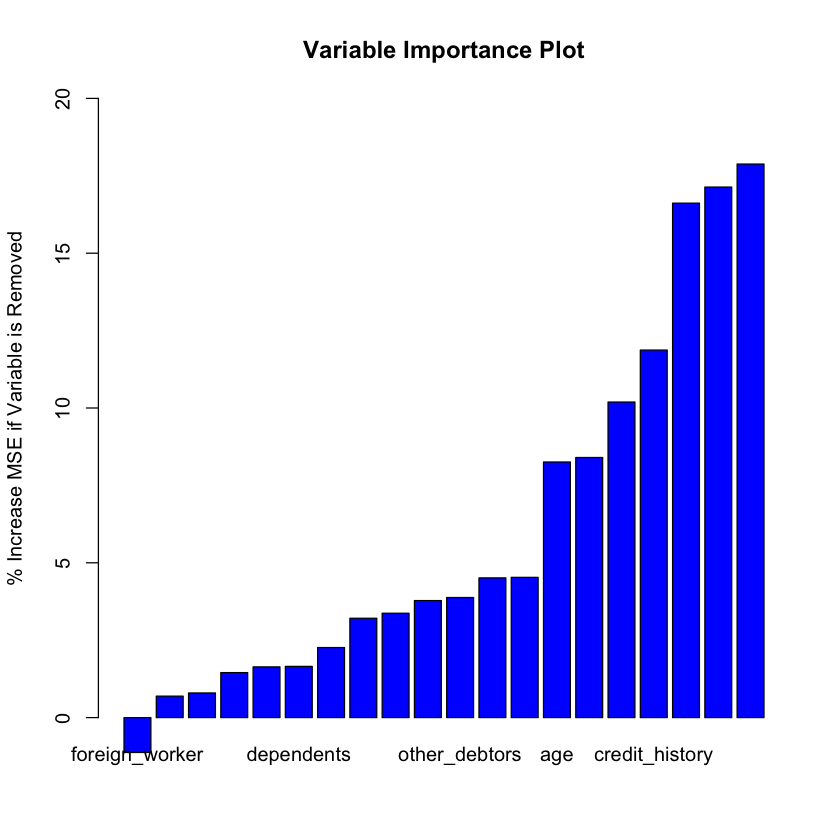

In [33]:
barplot(sort(imp), 
        col = "blue", 
        main = "Variable Importance Plot", 
        ylim = c(0,20),
        ylab = "% Increase MSE if Variable is Removed")

In [34]:
predicted_y = predict(model, testing_data)

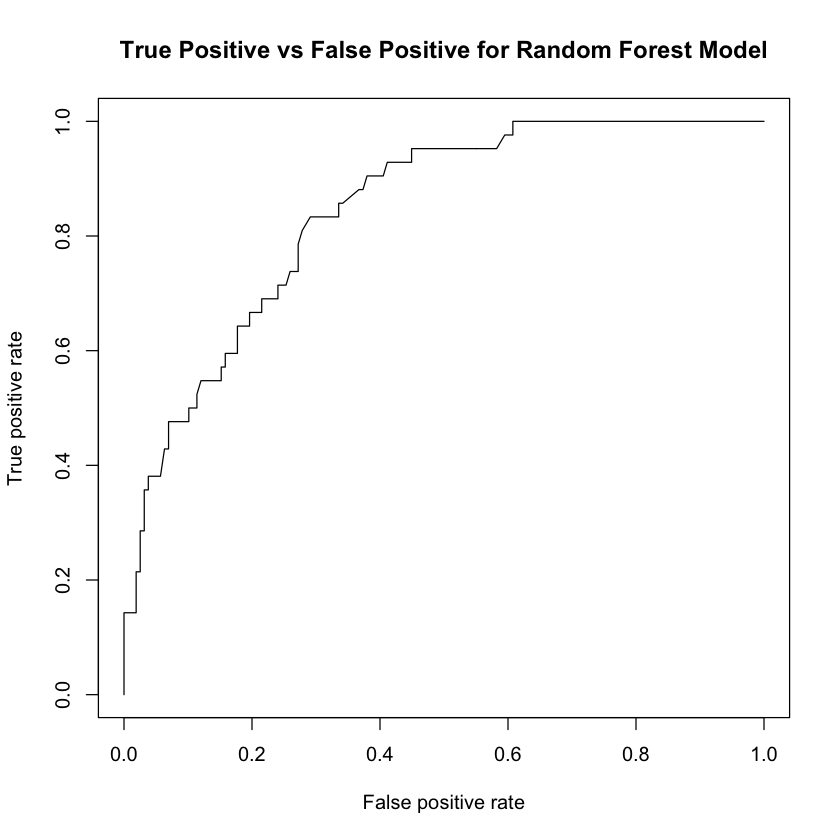

In [35]:
library(ROCR)

OOB.votes = predict(model, testing_data, type = "prob")
OOB.pred = OOB.votes[,2]

pred.obj = prediction(OOB.pred, testing_data$default)

ROC.perf = performance(pred.obj, "tpr", "fpr")
plot (ROC.perf, main = "True Positive vs False Positive for Random Forest Model")

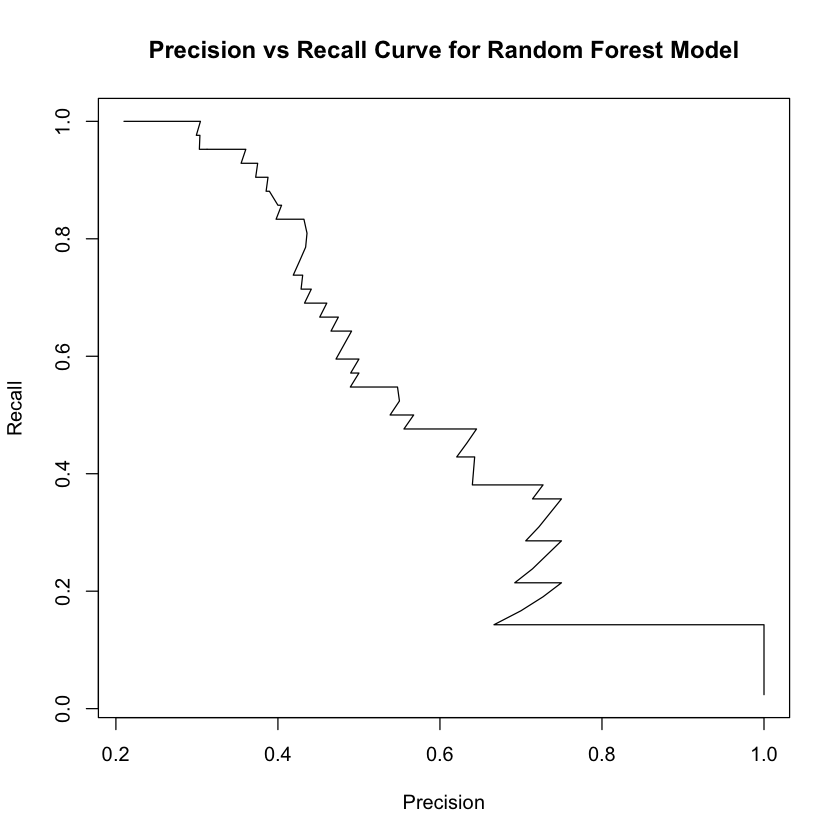

In [36]:
RP.perf <- performance(pred.obj, "rec","prec")
plot (RP.perf, main = "Precision vs Recall Curve for Random Forest Model")